In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel ('Downloads/walmart Retail Data.xlsx')

In [5]:
df.head

<bound method NDFrame.head of                 City  Customer Age      Customer Name Customer Segment  \
0         McKeesport           NaN     Jessica Myrick   Small Business   
1              Bowie           NaN     Matt Collister      Home Office   
2               Napa           NaN  Alan Schoenberger        Corporate   
3         Montebello           NaN  Elizabeth Moffitt         Consumer   
4               Napa           NaN  Alan Schoenberger        Corporate   
...              ...           ...                ...              ...   
8394       Fairfield          95.0      Tony Molinari        Corporate   
8395  Harker Heights          95.0    Matt Hagelstein      Home Office   
8396       Riverview          95.0      Theresa Swint         Consumer   
8397   Nicholasville          95.0    Maribeth Yedwab      Home Office   
8398   Nicholasville          95.0    Maribeth Yedwab      Home Office   

      Discount  Number of Records Order Date  Order ID Order Priority  \
0       

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df['Month'] = df['Order Date'].dt.month_name()

In [11]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,Month
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,January
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715,January
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559,January
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640,January
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559,January


In [13]:
df.shape

(8399, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [17]:
df.isnull().sum()

City                      0
Customer Age            903
Customer Name             0
Customer Segment          0
Discount                  0
Number of Records         0
Order Date                0
Order ID                  0
Order Priority            0
Order Quantity            0
Product Base Margin      63
Product Category          0
Product Container         0
Product Name              0
Product Sub-Category      0
Profit                    0
Region                    0
Row ID                    0
Sales                     0
Ship Date                 0
Ship Mode                 0
Shipping Cost             0
State                     0
Unit Price                0
Zip Code                  0
Month                     0
dtype: int64

In [19]:
#Identifyig the missing values
df.duplicated().sum()

0

In [21]:
#Identifying the Garbage Values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***")

City
Springfield         31
Columbus            31
Auburn              26
Roswell             25
Marion              24
                    ..
Sudbury              1
Tewksbury            1
Fairhaven            1
Killingly Center     1
Needham              1
Name: count, Length: 1421, dtype: int64
***
Customer Name
Darren Budd          41
Ed Braxton           38
Brad Thomas          35
Carlos Soltero       33
Patrick Jones        30
                     ..
Maria Etezadi         1
Dorothy Dickinson     1
Sample Company A      1
Natalie DeCherney     1
Craig Carreira        1
Name: count, Length: 795, dtype: int64
***
Customer Segment
Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: count, dtype: int64
***
Order Priority
High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: count, dtype: int64
***
Product Category
Office Supplies    4610
Technology         2065
Furniture         

In [23]:
### Exploratory Data Analsyis

In [25]:
#Descriptive statistics
df.describe()

,Customer Age,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Ship Date,Shipping Cost,Unit Price,Zip Code
count,7496.000000,8399.000000,8399.0,8399,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000
mean,54.542823,0.049671,1.0,2013-12-24 18:31:30.225026560,29965.179783,25.571735,0.512513,181.184422,4200.000000,1775.878179,2013-12-26 19:17:37.411596544,12.838557,89.346259,52839.139421
min,41.000000,0.000000,1.0,2012-01-01 00:00:00,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,2012-01-02 00:00:00,0.490000,0.990000,1001.000000
25%,47.000000,0.020000,1.0,2012-12-20 00:00:00,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,2012-12-22 12:00:00,3.300000,6.480000,30337.000000
50%,53.000000,0.050000,1.0,2013-12-17 00:00:00,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,2013-12-18 00:00:00,6.070000,20.990000,52732.000000
75%,61.000000,0.080000,1.0,2015-01-01 12:00:00,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,2015-01-03 12:00:00,13.990000,85.990000,77577.000000
max,95.000000,0.250000,1.0,2015-12-30 00:00:00,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000,99362.000000
std,9.519435,0.031823,0.0,NaN,17260.883447,14.481071,0.135589,1196.653326,2424.726789,3585.050525,NaN,17.264052,290.354383,28509.535635


In [27]:
df.describe(include = "object")

,City,Customer Name,Customer Segment,Order Priority,Product Category,Product Container,Product Name,Product Sub-Category,Region,Ship Mode,State,Month
count,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399
unique,1421,795,4,5,3,7,1263,17,4,3,48,12
top,Springfield,Darren Budd,Corporate,High,Office Supplies,Small Box,"Global High-Back Leather Tilter, Burgundy",Paper,Central,Regular Air,California,May
freq,31,41,3076,1768,4610,4347,24,1225,2710,6270,780,778


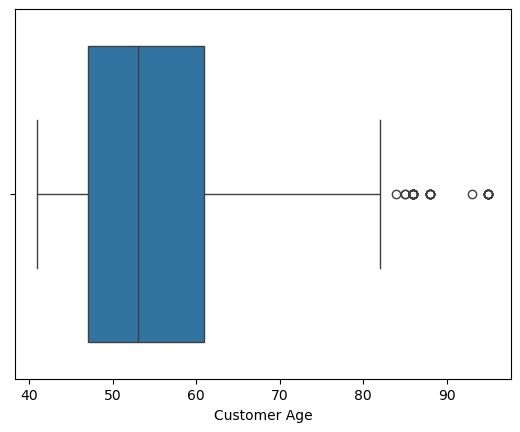

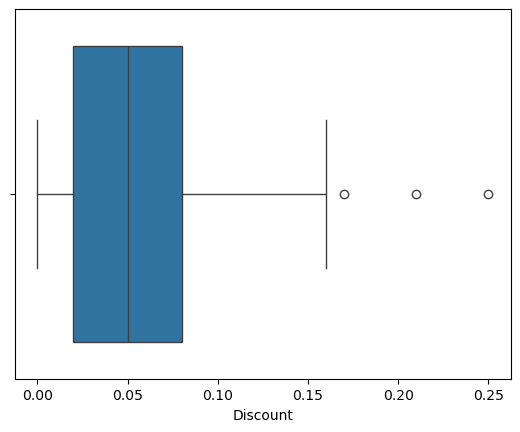

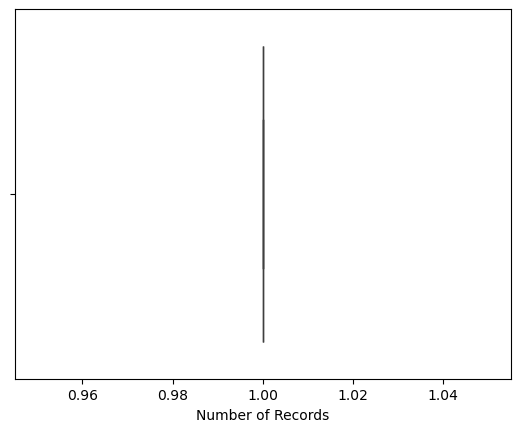

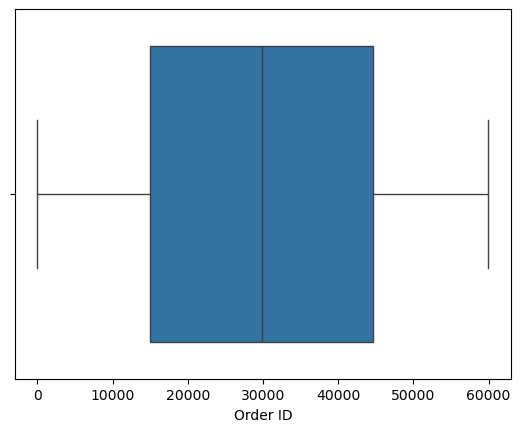

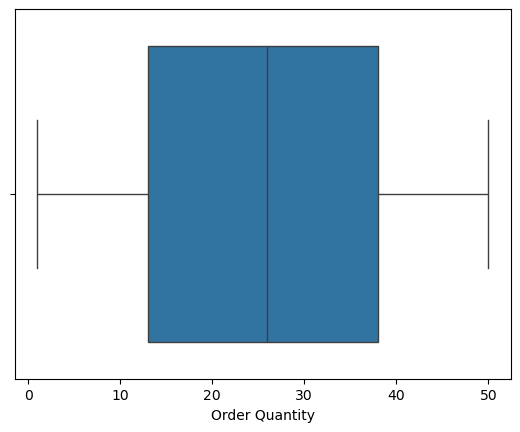

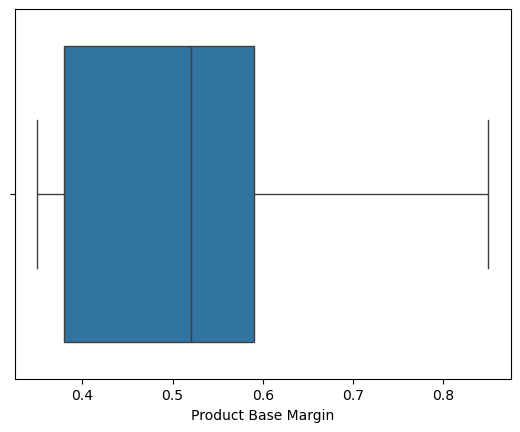

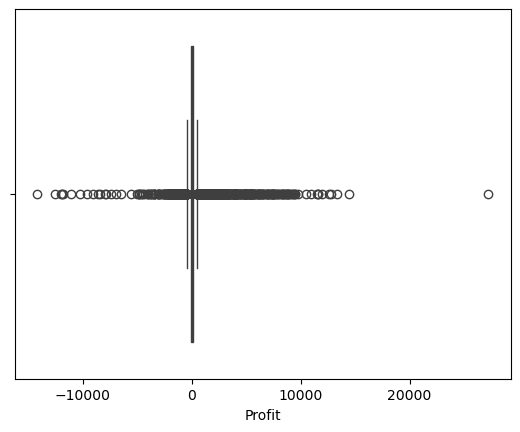

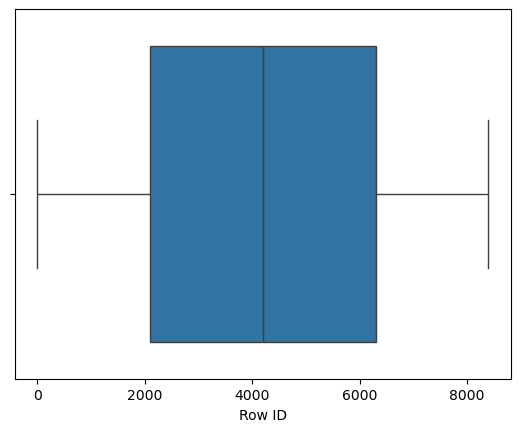

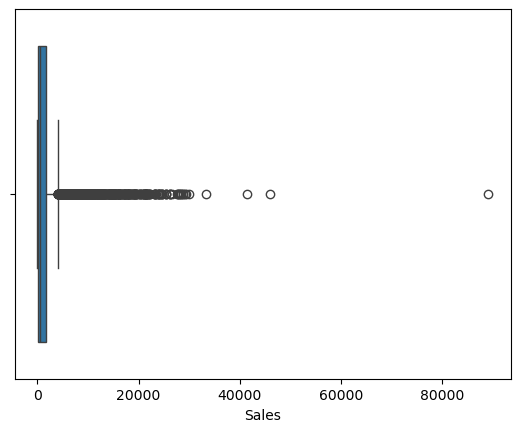

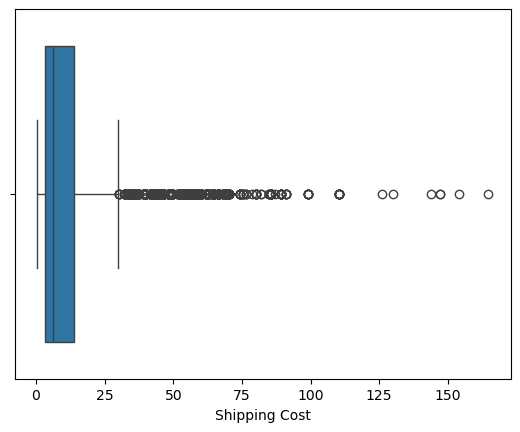

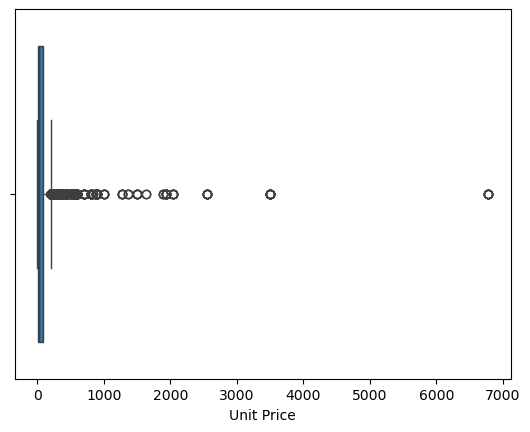

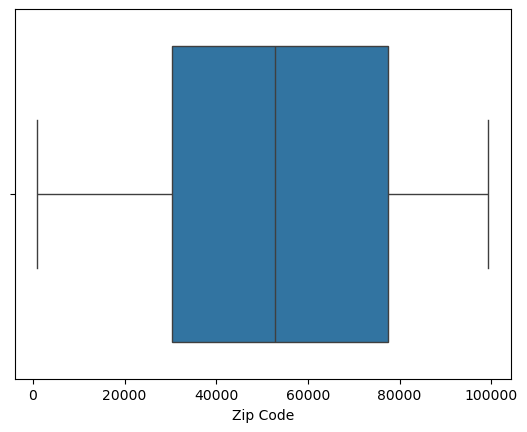

In [34]:
#Boxplot to identify the Outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [36]:
df.select_dtypes(include="number").columns

Index(['Customer Age', 'Discount', 'Number of Records', 'Order ID',
       'Order Quantity', 'Product Base Margin', 'Profit', 'Row ID', 'Sales',
       'Shipping Cost', 'Unit Price', 'Zip Code'],
      dtype='object')

In [37]:
df.columns

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code', 'Month'],
      dtype='object')

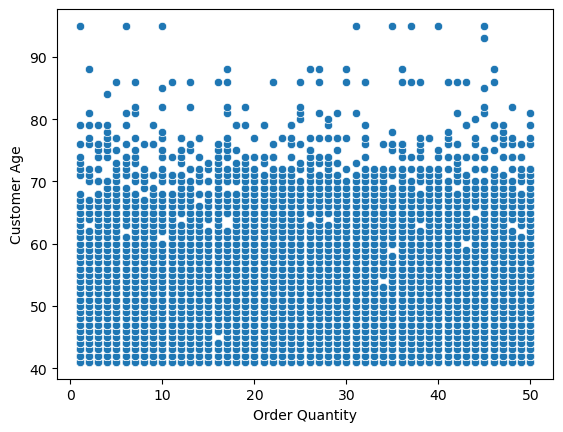

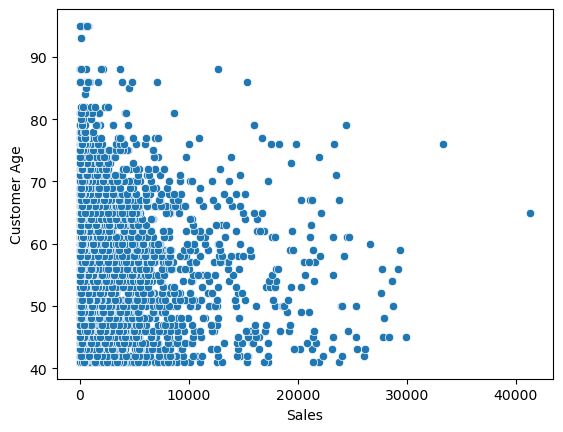

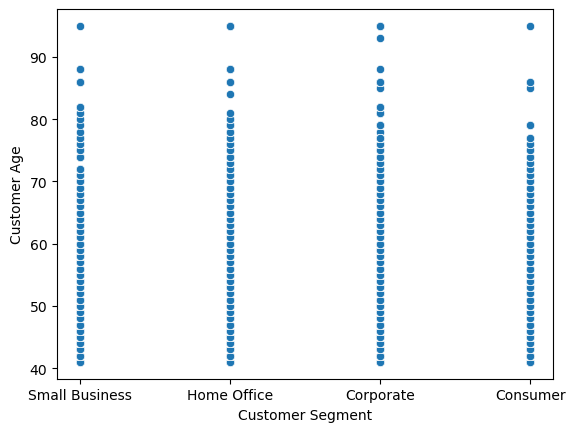

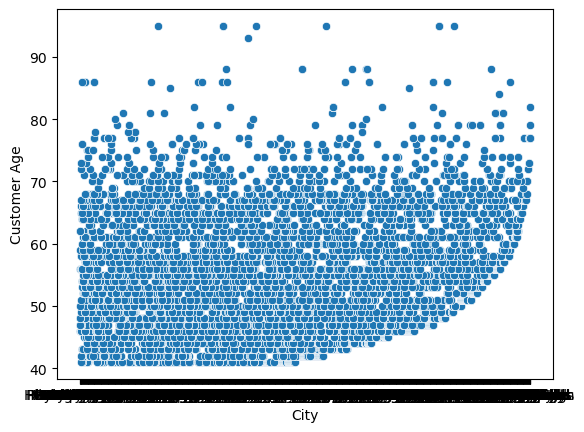

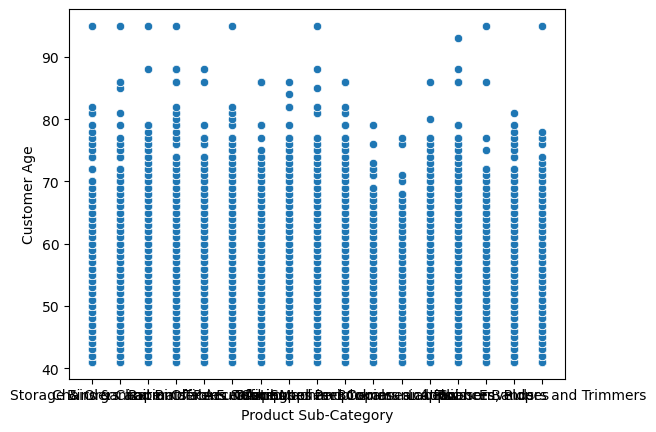

In [42]:
#scatter plot to understand the relationship
for i in ['Order Quantity', 'Sales', 'Customer Segment', 'City',  'Product Sub-Category' ] :
    sns.scatterplot(data=df, x=i, y='Customer Age')
    plt.show()

In [46]:
#correlation with heatmap to interept the realtion and multicolliniarity
df.select_dtypes(include="number").corr()


,Customer Age,Discount,Number of Records,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Shipping Cost,Unit Price,Zip Code
Customer Age,1.000000,0.015572,NaN,0.019997,0.017478,-0.018637,-0.009465,0.019901,0.005758,0.008038,0.011044,0.002719
Discount,0.015572,1.000000,NaN,-0.003213,-0.009649,0.004079,-0.037128,-0.003289,-0.019686,-0.001956,0.001332,-0.007921
Number of Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order ID,0.019997,-0.003213,NaN,1.000000,0.010953,-0.022557,-0.006820,0.999961,-0.007792,-0.004582,-0.004304,-0.002897
Order Quantity,0.017478,-0.009649,NaN,0.010953,1.000000,0.007839,0.194655,0.011103,0.220582,-0.011457,-0.104284,0.006448
Product Base Margin,-0.018637,0.004079,NaN,-0.022557,0.007839,1.000000,-0.112985,-0.022726,0.156759,0.373826,0.057838,-0.010561
Profit,-0.009465,-0.037128,NaN,-0.006820,0.194655,-0.112985,1.000000,-0.006605,0.581960,-0.021362,-0.008854,-0.001158
Row ID,0.019901,-0.003289,NaN,0.999961,0.011103,-0.022726,-0.006605,1.000000,-0.007560,-0.004713,-0.004115,-0.003037
Sales,0.005758,-0.019686,NaN,-0.007792,0.220582,0.156759,0.581960,-0.007560,1.000000,0.434578,0.602521,0.007857
Shipping Cost,0.008038,-0.001956,NaN,-0.004582,-0.011457,0.373826,-0.021362,-0.004713,0.434578,1.000000,0.239959,-0.009986


<Axes: >

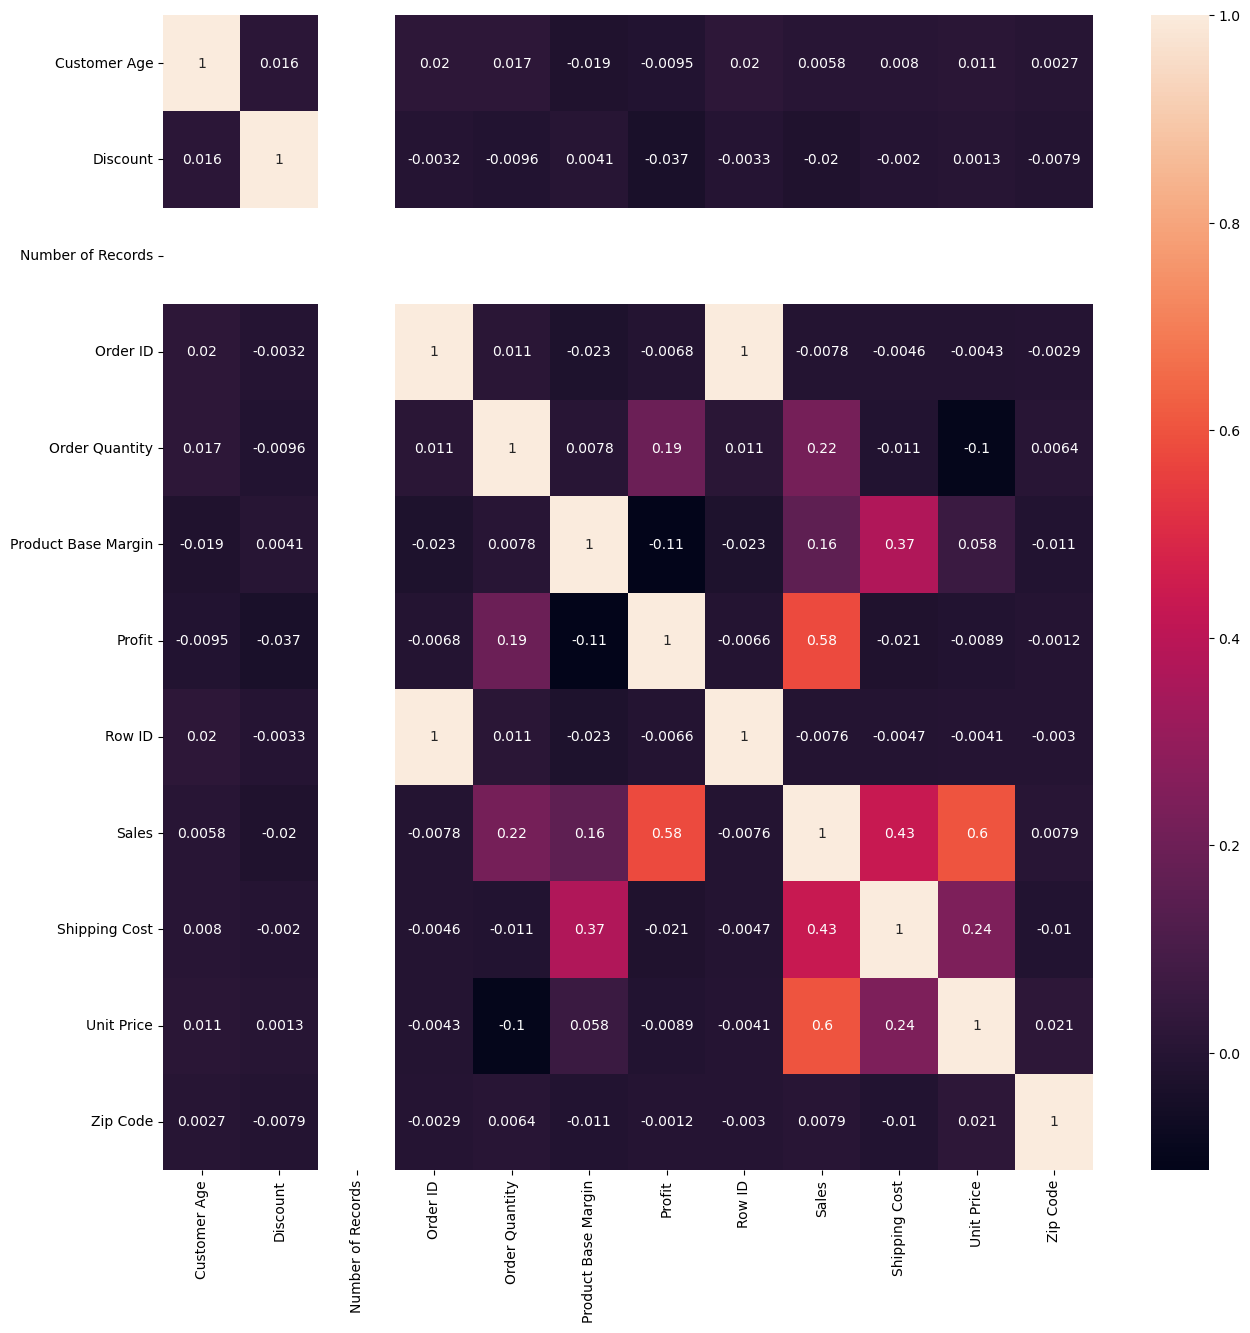

In [47]:
s = df.select_dtypes(include="number").corr()
plt.figure(figsize= (15,15))
sns.heatmap(s, annot= True)

In [45]:
## ARIMA or Seasonal ARIMA

In [52]:
%matplotlib inline

In [54]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,Month
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,January
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715,January
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559,January
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640,January
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559,January


In [56]:
data = df[['Month', 'Sales']]

In [58]:
data.head()

,Month,Sales
0,January,180.36
1,January,872.48
2,January,1239.06
3,January,614.80
4,January,4083.19


In [60]:
data.set_index('Month', inplace=True)

In [62]:
data.head()

,Sales
Month,
January,180.36
January,872.48
January,1239.06
January,614.80
January,4083.19


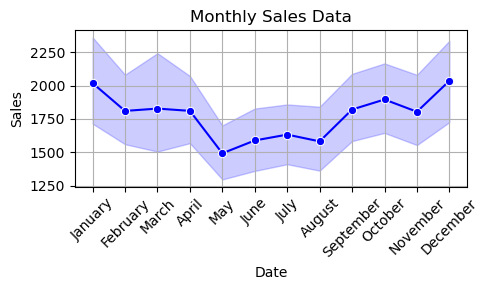

In [64]:
plt.figure(figsize=(5, 3))
sns.lineplot(x='Month', y='Sales', data=df, marker='o', color='b')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [66]:
## Testing For Statiionarity

from statsmodels.tsa.stattools import adfuller

In [68]:
test = adfuller(df['Sales'])

In [70]:
# H0 : It is not stationary
# H1 : Is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print ("strong evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against nll hypothesis, time series has a unit root, indicating it is not stationary")

In [72]:
adfuller_test(df['Sales'])

ADF Test Statistic : -88.37214147310665
p-value : 0.0
#Lags Used : 0
Number of observations used : 8398
strong evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary


In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [96]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
df.set_index('Order Date', inplace = True)

In [100]:
train = df[df.index < '2015-01-01']
test = df[df.index >='2015-01-01']

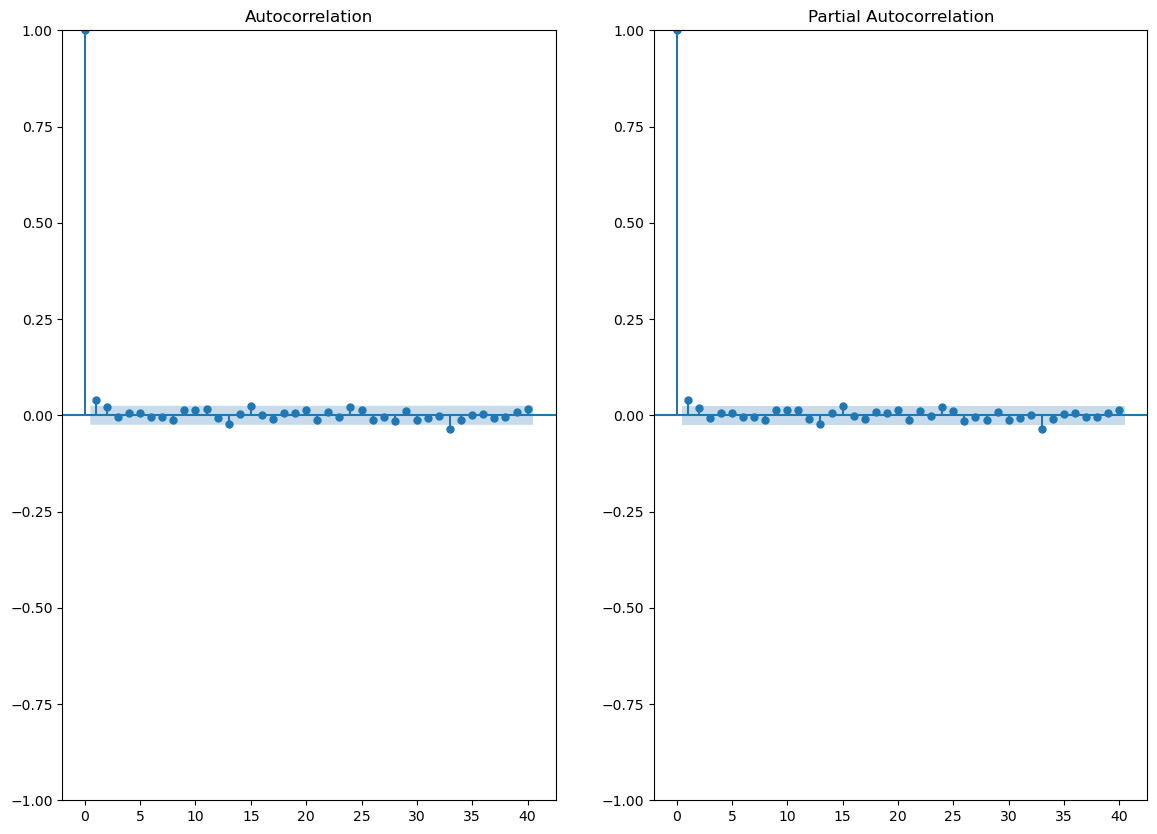

In [112]:
plt.figure(figsize=(14,10))
plt.subplot(121)
plot_acf(train['Sales'], ax=plt.gca(), lags=40)

plt.subplot(122)
plot_pacf(train['Sales'], ax=plt.gca(), lags=40)

plt.show()

In [114]:
p, d, q = 1,1,1
model = ARIMA(train['Sales'], order=(p,d,q))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [115]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 6297
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -60553.487
Date:                Mon, 06 Jan 2025   AIC                         121112.973
Time:                        18:56:55   BIC                         121133.216
Sample:                             0   HQIC                        121119.986
                               - 6297                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0395      0.010      4.059      0.000       0.020       0.059
ma.L1         -1.0000      0.003   -349.752      0.000      -1.006      -0.994
sigma2      1.321e+07   2.03e-10    6.5e+16      0.0

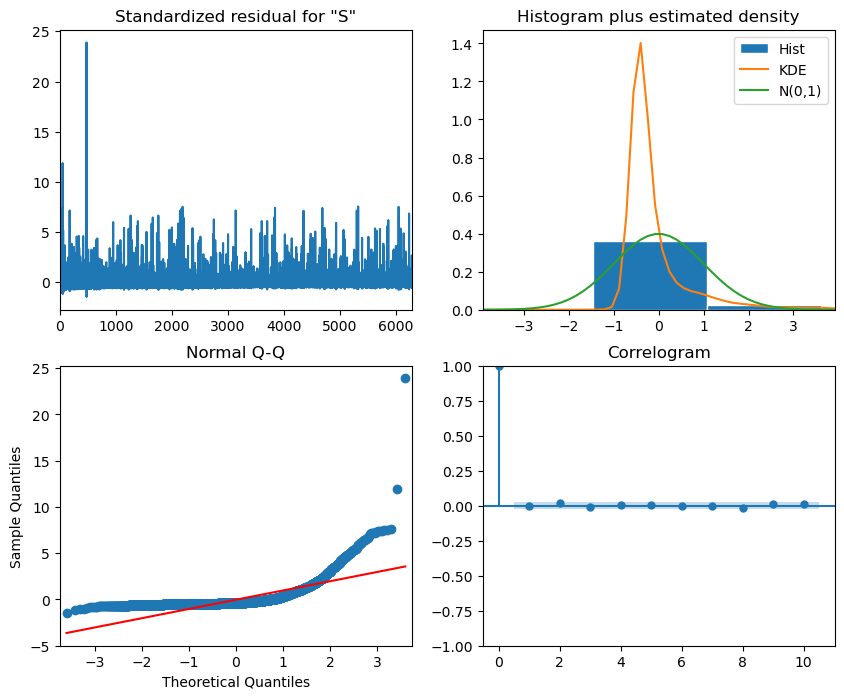

In [116]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()